In [6]:
from google.colab import drive
import os.path
drive.mount('/content/gdrive', force_remount=True)
data_set_path = '/content/gdrive/MyDrive/ML/HW13/'

Mounted at /content/gdrive


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline


df = pd.read_csv(data_set_path + 'IMDB Dataset.csv')

df.dropna(inplace=True)


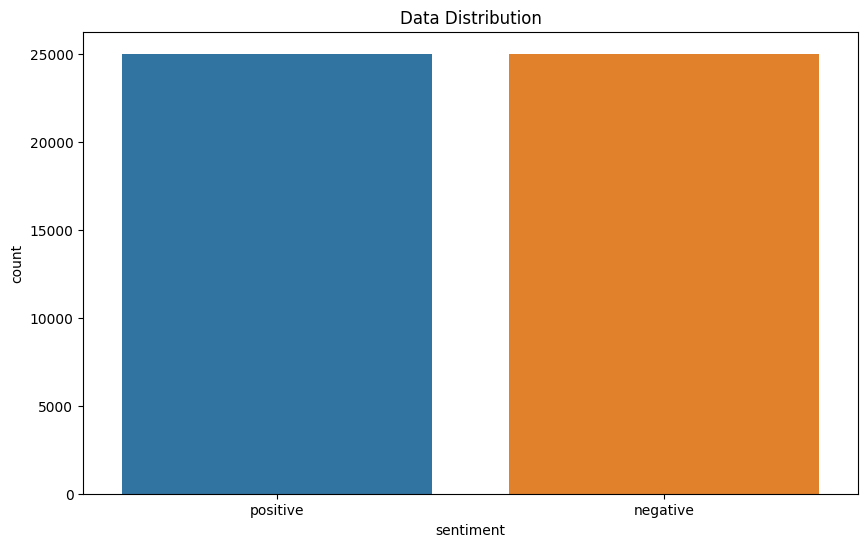

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,6))
plt.title("Data Distribution")
sns.countplot(x = "sentiment", data = df)

plt.show()

In [32]:
!python -m spacy download en_core_web_sm

2023-09-17 13:59:00.594123: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [8]:
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

print('Original:')
print(df.iloc[1,0])
nlp = spacy.blank("en")
tfidf_vectorizer = TfidfVectorizer()
#cleanup text from html artifacts
def clean_review(text):
    clean_text = re.sub('<br\s?\/>|<br>', '', text)
    clean_text = re.sub('[^a-zA-Z\']', ' ', clean_text)
    clean_text = clean_text.lower()
    doc = nlp(clean_text)
    return doc

data = df

data['review'] = data['review'].apply(lambda x : clean_review(x))
print('cleaned:')
print(data.iloc[1,0])

Original:
A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly we

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

X = data['review']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform([str(doc) for doc in X_train])
X_test_tfidf = tfidf_vectorizer.transform([str(doc) for doc in X_test])


classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)


y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed evaluation metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.86
              precision    recall  f1-score   support

    negative       0.85      0.89      0.87      4961
    positive       0.88      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

